In [1]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../scripts')
import pmixSample
import os
os.getcwd() 

'/Users/odiazib/csp_clang_bld_develop/TChem++/install/example/runs/PlugFlowReactor/X_SA'

In [2]:
# Pressure, Temperature, phi(stoichiometric ratio)
one_atm = 101325

TempMin = 800
TempMax = 1000

PressureMax = 1*one_atm; # atm
PressureMin = 1*one_atm; # atm

phiMin = 1.0; # 
phiMax = 2.0; # 

velMin = 1.9e-2*0.8
velMax = 1.9e-2*1.2

nC=1
fuel ='CH4(2)'

In [3]:
Nvel = 2
Npt = 2
Npphi = 2
N = Nvel*Npt*Npphi
pressure    = [1] #, np.linspace(PressureMin, PressureMax, Npp) #
temperature = np.linspace(TempMin, TempMax,Npt)
eqratio     = [phiMin, phiMax]#np.linspace(phiMin, phiMax,Npphi)
velocity = [velMin,velMax]
vel, temp, phi = np.meshgrid(velocity, temperature,eqratio)


vel    = vel.reshape(np.size(vel)) #flatten()
temp = temp.reshape(np.size(temp))#flatten()
phi  = phi.reshape(np.size(phi))#flatten()
sample = np.zeros([N,5])

In [4]:
for i in range(N):
    sample[i,0] = temp[i]
    sample[i,1] = one_atm
    Yp_fuel, Yr_o2, Yr_n2, Yr_ar = pmixSample.getMassFraction(nC,phi[i])
    sample[i,2] = Yp_fuel
    sample[i,3] = Yr_o2
    sample[i,4] = Yr_n2 +Yr_ar

In [5]:
filename = 'inputs/'
header_fuel = "T P "+fuel+" O2(3) AR"
np.savetxt(filename+'sample.dat', sample, header=header_fuel, comments='')

np.savetxt(filename+'sampleMarkDown.dat', sample,fmt='%10.5f', header=header_fuel, comments='')

In [6]:
header_site ='X(1) OX(25)'# 'X(1)'#
sampleSurf = np.ones([N,2])
sampleSurf[:,0] = 0.1
sampleSurf[:,1] = 0.9

np.savetxt(filename+'inputSurf.dat', sampleSurf, header=header_site, comments='')

In [7]:
sampleVel = vel
np.savetxt(filename+'inputVelocity.dat', sampleVel, comments='')

In [9]:
data = np.genfromtxt("PFRSolution.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)
niterT, Nvars = np.shape(solTchem)
Nsamples = len(np.where(solTchem[:,0]==-1)[0])
print('Number of Samples',Nsamples)
print(niterT, Nvars)

Number of Samples 8
8008 44


In [10]:
solTchem = solTchem.reshape( int(niterT/Nsamples), Nsamples,Nvars)

No:0 ϕ: 1.0 Temp: 800.0 Vel: 0.0152
No:1 ϕ: 2.0 Temp: 800.0 Vel: 0.0152
No:2 ϕ: 1.0 Temp: 800.0 Vel: 0.022799999999999997
No:3 ϕ: 2.0 Temp: 800.0 Vel: 0.022799999999999997
No:4 ϕ: 1.0 Temp: 1000.0 Vel: 0.0152
No:5 ϕ: 2.0 Temp: 1000.0 Vel: 0.0152
No:6 ϕ: 1.0 Temp: 1000.0 Vel: 0.022799999999999997
No:7 ϕ: 2.0 Temp: 1000.0 Vel: 0.022799999999999997


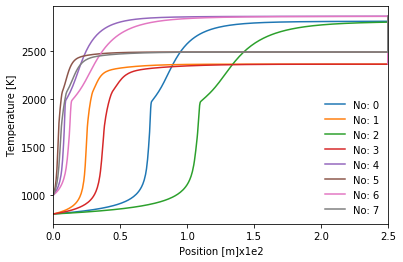

In [11]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('Temperature[K]')]
    print('No:'+str(sp)+' ϕ: '+str(phi[sp])+' Temp: '+str(temp[sp]) +' Vel: '+str(vel[sp]) ) 
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Temperature [K]')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,2.5])
plt.savefig('TempSamplesPFR.pdf',bbox_inches='tight')

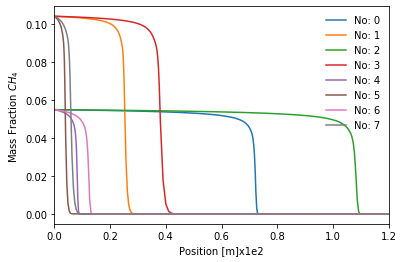

In [12]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('CH4(2)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Mass Fraction $CH_4$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,1.2])
plt.savefig('CH4SamplesPFR.pdf',bbox_inches='tight')

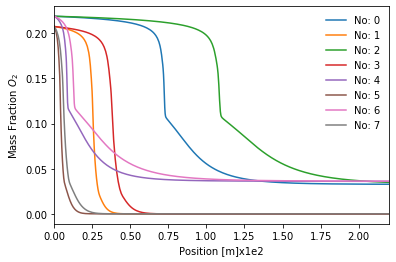

In [13]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('O2(3)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Mass Fraction $O_2$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,2.2])
plt.savefig('O2SamplesPFR.pdf',bbox_inches='tight')

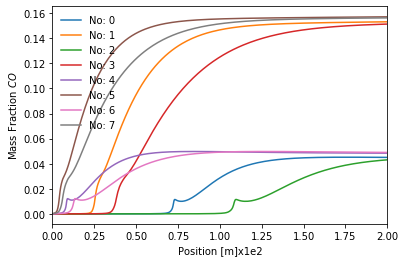

In [14]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('CO(7)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Mass Fraction $CO$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,2.0])
plt.savefig('COSamplesPFR.pdf',bbox_inches='tight')

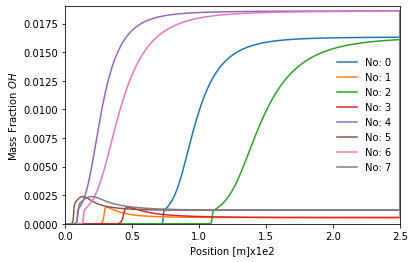

In [15]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('OH(17)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Mass Fraction $OH$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,2.5])
plt.ylim([0,0.019])
plt.savefig('OHSamplesPFR.pdf',bbox_inches='tight')

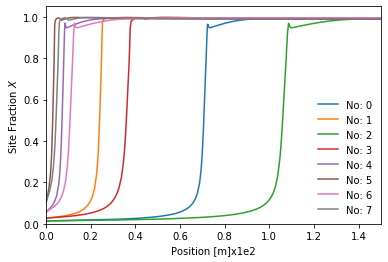

In [16]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('X(1)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Site Fraction $X$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,1.5])
plt.ylim([0,1.05])
plt.savefig('XSamplesPFR.pdf',bbox_inches='tight')

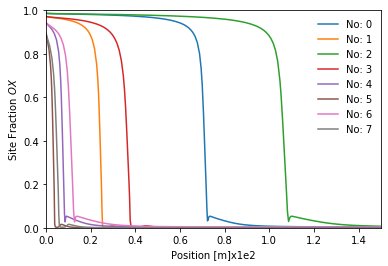

In [17]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('OX(25)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Site Fraction $OX$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,1.5])
plt.ylim([0,1.])
plt.savefig('OXSamplesPFR.pdf',bbox_inches='tight')

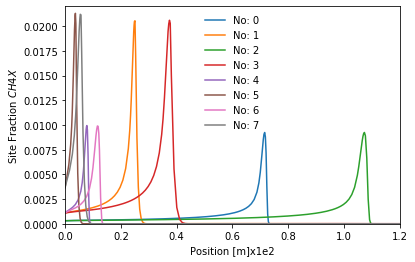

In [18]:
plt.figure()
for sp in range(Nsamples):
    x  = solTchem[:,sp,  Header.index('t')]*1e2
    y1 = solTchem[:,sp,  Header.index('CH4X(24)')]
    plt.plot(x,y1,'-',label='No: '+str(sp))
plt.legend(loc='best',frameon=False) 
plt.ylabel('Site Fraction $CH4X$ ')
plt.xlabel('Position [m]x1e2')
plt.xlim([0,1.2])
plt.ylim([0,0.022])
plt.savefig('CH4XSamplesPFR.pdf',bbox_inches='tight')